In a dendrogram, each data point or cluster is represented by a horizontal line. The vertical height of the line represents the similarity or dissimilarity between the data points or clusters. The longer the vertical line, the greater the dissimilarity. The lines are joined together at different levels to form branches, and the branches themselves merge at higher levels, ultimately leading to a single trunk

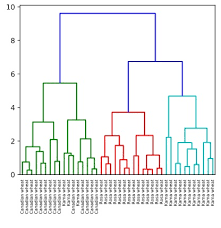

In [ ]:
from sklearn.datasets  import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas  as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
X=pd.read_csv('/content/')

**FEATURE SCALING**

Min-Max scale
X_scaled = (X - X_min) / (X_max - X_min)

Standard scale
X_scaled = (X - mean) / standard_deviation



In [ ]:

def scale_dataset(dataset, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose either 'minmax' or 'standard'.")

    scaled_dataset = scaler.fit_transform(dataset)
    return scaled_dataset


**OUTLIER REMOVAL**

Method for outlier removal is the z-score method.To remove outliers from a dataset, you can use a general function that identifies and eliminates observations that are considered outliers.

In [ ]:
def remove_outliers(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    mask = np.abs(z_scores) < threshold
    cleaned_data = data[mask]
    return cleaned_data

In [ ]:
# Generating sample data from make_blobs.
# Dont run this command if you have your X data.
X,y=make_blobs(n_samples=500,
               n_features=2,
               centers=4,
               cluster_std=1.01,
               center_box=(-10.0,10.0),
               shuffle=True,
               )
range_n_clusters=[2,3,4,5,6]

We iterate over a range of cluster numbers, perform agglomerative clustering for each number of clusters, calculate the silhouette score, and print the results. You can then analyze the silhouette scores to determine the optimal number of clusters.

##  Hyper-parameters of Hierarchical clustering

**n_clusters (int)** :The number of clusters to find. It must be None if distance_threshold is not None.



In [ ]:
#  X is your data
# Define a range of cluster numbers to evaluate
min_clusters = 2 #@param {type :"integer"}
max_clusters = 10  #@param {type :"integer"}

# Perform agglomerative clustering for different numbers of clusters.
# Iterate over the range of cluster numbers from min_clusters to max_clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create an instance of AgglomerativeClustering with the current number of clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the clustering model and obtain the predicted labels for the data points
    labels = clustering.fit_predict(X)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, labels)

    # Print the results, indicating the number of clusters and its average silhouette score
    print(f"For {n_clusters} clusters, the average silhouette score is: {silhouette_avg}")



For 2 clusters, the average silhouette score is: 0.6311881411586676
For 3 clusters, the average silhouette score is: 0.7384489291301688
For 4 clusters, the average silhouette score is: 0.8246780213284155
For 5 clusters, the average silhouette score is: 0.6876129030009107
For 6 clusters, the average silhouette score is: 0.5806919187098706
For 7 clusters, the average silhouette score is: 0.46643118814215295
For 8 clusters, the average silhouette score is: 0.3250668822407446
For 9 clusters, the average silhouette score is: 0.3242037904166779
For 10 clusters, the average silhouette score is: 0.3267152943160451


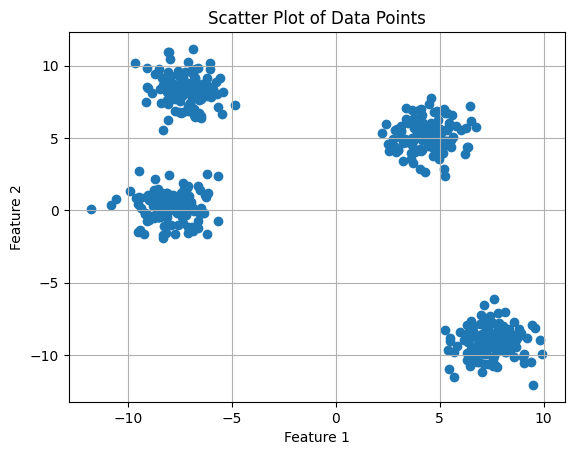

In [ ]:
plt.scatter(X[:,0],X[:,1])
# Add a title to the plot
plt.title("Scatter Plot of Data Points")

# Add comments for more information
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)  # Add grid lines to the plot

# Display the plot
plt.show()

**linkage**: {‘ward’, ‘complete’, ‘average’, ‘single’}

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

In [ ]:
# Set the desired number of clusters
best_num_cluster = 4 #@param {type :"integer"}

linkage =  'single' #@param {type : "string"}

# Create an instance of AgglomerativeClustering with specified parameters
clustering = AgglomerativeClustering(n_clusters=best_num_cluster, linkage=linkage)

# Fit the clustering model and obtain the predicted labels for the data points
labels = clustering.fit_predict(X)

# Calculate the average silhouette score for the clustering
silhouette_avg = silhouette_score(X, labels)

# Print the results, indicating the number of clusters and the corresponding average silhouette score
print(f"For {best_num_cluster} clusters, the average silhouette score is: {silhouette_avg}")

For 4 clusters, the average silhouette score is: 0.8246780213284155


**distance_threshold (float)** : The distance_threshold parameter in AgglomerativeClustering allows you to specify the distance threshold for the clustering process.



The loop prints the number of clusters (i) and the corresponding average silhouette score. This allows you to evaluate the quality of clustering results for different numbers of clusters based on the silhouette score.

In [ ]:
for i in range(2,50):
  clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=i)

  # Fit the clustering model and obtain the predicted labels for the data points
  labels = clustering.fit_predict(X)

  # Calculate the average silhouette score for the clustering
  silhouette_avg = silhouette_score(X, labels)

  # Print the results, indicating the number of clusters and the corresponding average silhouette score
  print(f"For {i} clusters, the average silhouette score is: {silhouette_avg}")

For 2 clusters, the average silhouette score is: 0.38200982554921675
For 3 clusters, the average silhouette score is: 0.340011081604164
For 4 clusters, the average silhouette score is: 0.3251291138170439
For 5 clusters, the average silhouette score is: 0.3240387475037324
For 6 clusters, the average silhouette score is: 0.332806253706633
For 7 clusters, the average silhouette score is: 0.3259665119177424
For 8 clusters, the average silhouette score is: 0.32045147283468883
For 9 clusters, the average silhouette score is: 0.32045147283468883
For 10 clusters, the average silhouette score is: 0.33145282578405294
For 11 clusters, the average silhouette score is: 0.3250668822407446
For 12 clusters, the average silhouette score is: 0.46643118814215295
For 13 clusters, the average silhouette score is: 0.6876129030009107
For 14 clusters, the average silhouette score is: 0.8246780213284155
For 15 clusters, the average silhouette score is: 0.8246780213284155
For 16 clusters, the average silhouette

  Elow curve ploted for finding the k value, graph k values on x-axis and wscc on y axis.
 Agglomerative clustering is from bottom to top of dendogram.
 With the help of Dendogram Hierarchical clustering is done.
In dendogram we have to find longest vertical line ,which have No horizontal line passing through it.
 For validation of clustering model we use silhoutte score.
 formula for silhouette_score = (b - a) / max(a, b) score range from -1 to 1.



In the elbow method, we analyze the curve to identify the point where there is a sharp change. Once we find this point of significant change, we observe the corresponding value on the x-axis to determine the suitable K value for the K-means algorithm.

 The elbow method is commonly used to determine the optimal value of 'k' in k-means clustering by examining the plot of the within-cluster sum of squares (WCSS) against different values of 'k'

 WCSS :
 Within-Cluster Sum of Squares (WCSS): For each 'k,' calculate the WCSS, which is the sum of squared distances between each data point and its centroid within a cluster. It represents the compactness of the clusters. The WCSS can be obtained as the sum of the squared distances for each data point from its assigned cluster center.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

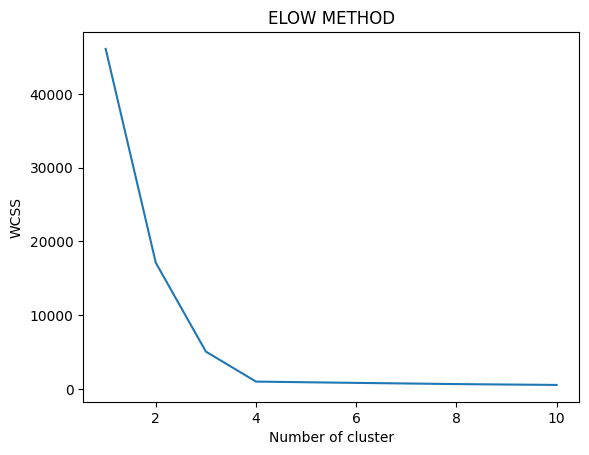

In [ ]:
wcss=[]
for i in range(1,12):
  km=KMeans(n_clusters=i,init='k-means++',random_state=0) # k means ++ initialise centroids far way from
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1,12),wcss,linestyle='--')
plt.scatter(range(1,12),wcss)
plt.title('ELOW METHOD')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In the dendrogram, we need to identify the longest vertical line that is not intersected by any horizontal line. By observing the dendrogram, we can observe the formation of four distinct clusters.

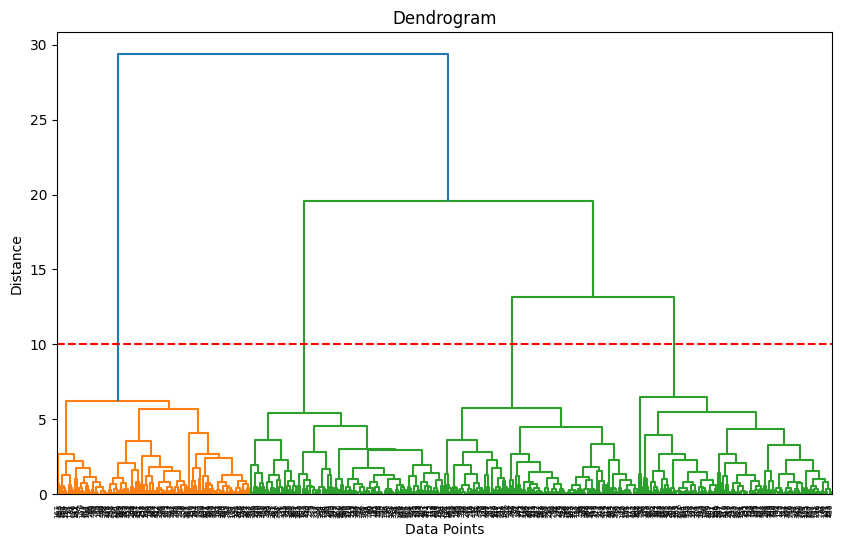

In [ ]:
# Compute the linkage matrix
Z = sch.linkage(X, method='complete')  # X is the data matrix

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(Z)
plt.title('Dendrogram')

# Draw a horizontal line at y=10
plt.axhline(y=10, color='red', linestyle='--')

plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

The silhouette score is a metric used for validating a model's performance.Vertical dot line is a Silhoutte score.
When analyzing a graph, it is advisable to select a larger number of clusters that do not exhibit negative shift.

To determine the effectiveness of each cluster, we need to assess if any of them are experiencing negative outcomes. If none of the clusters exhibit negative indicators, then we can conclude that this particular number of clusters is performing satisfactorily.

For n_clusters = 2 The average silhouette_score is : 0.6311881411586676
For n_clusters = 3 The average silhouette_score is : 0.7384489291301688
For n_clusters = 4 The average silhouette_score is : 0.8246780213284155
For n_clusters = 5 The average silhouette_score is : 0.6992499742046078
For n_clusters = 6 The average silhouette_score is : 0.5860265839525294


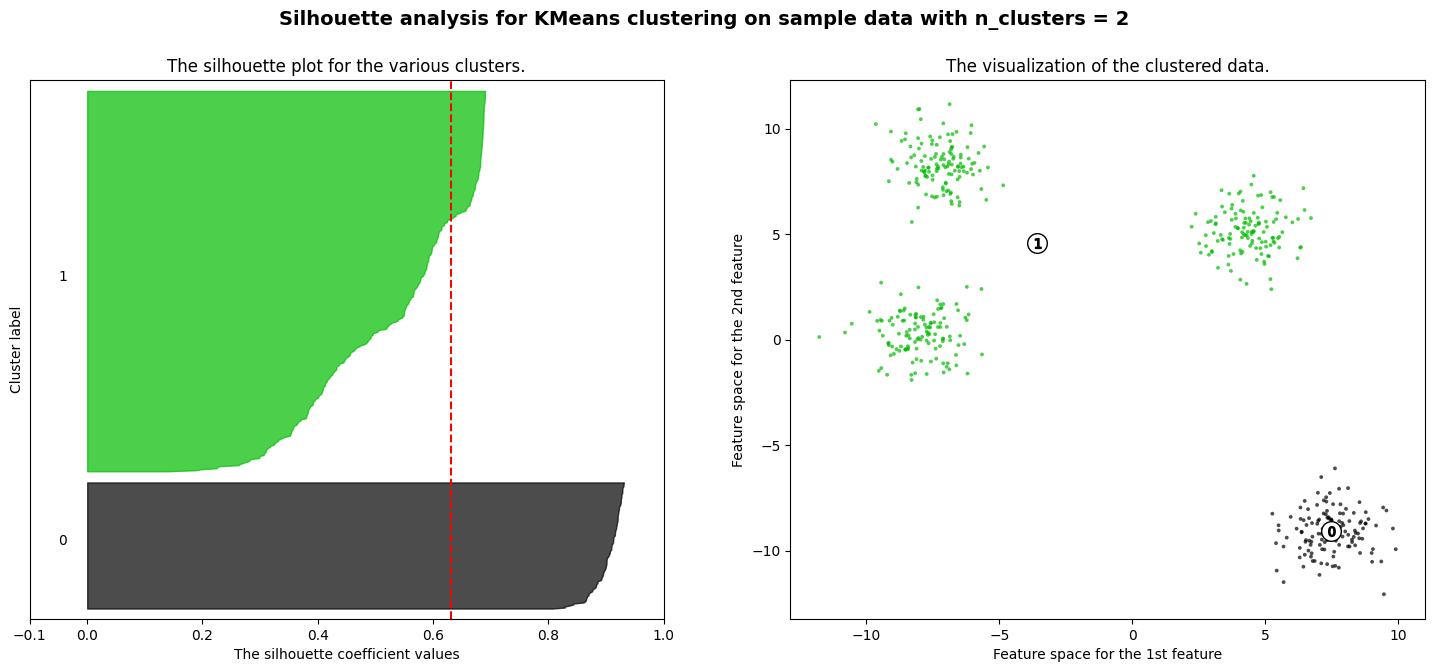

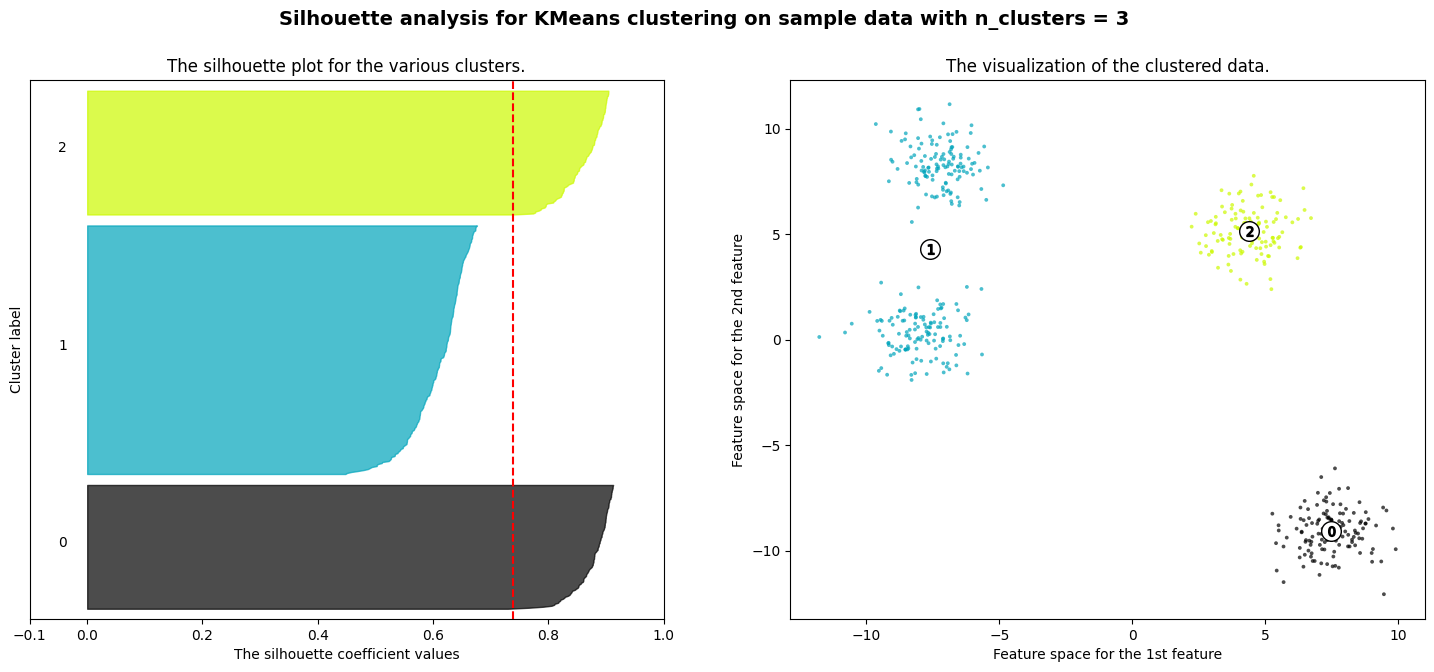

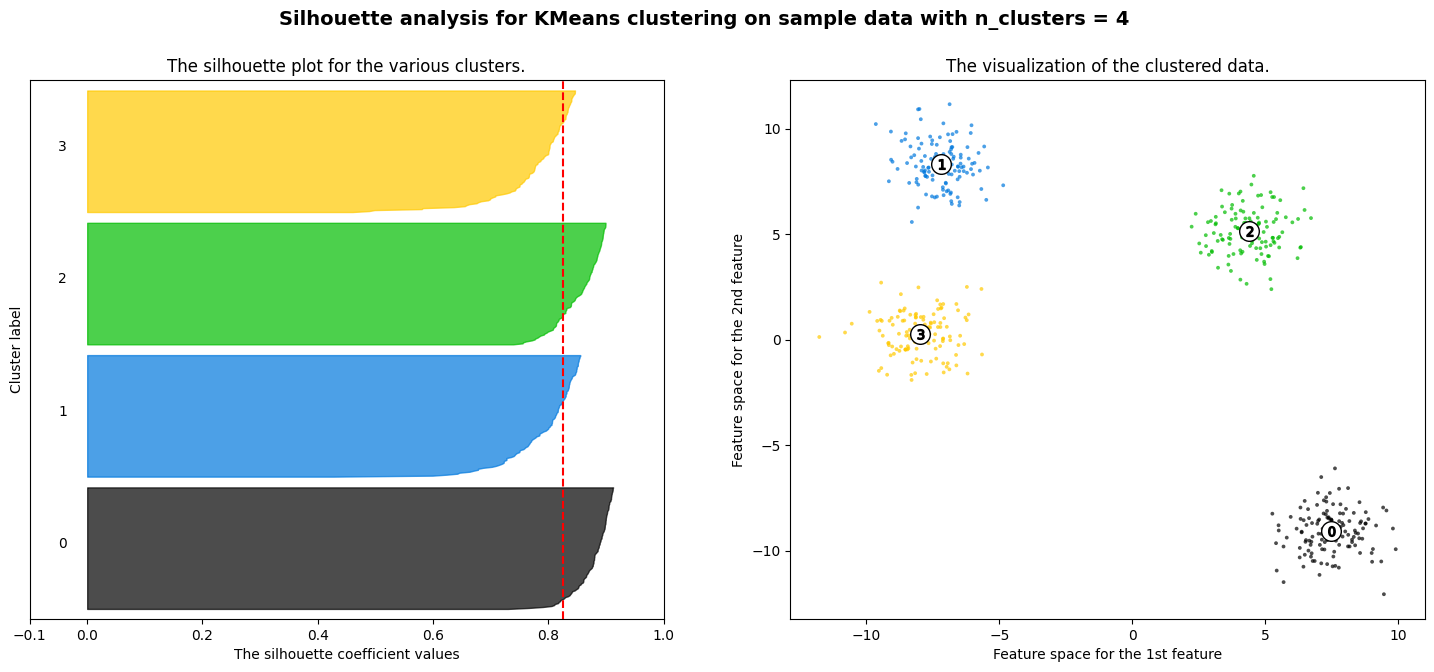

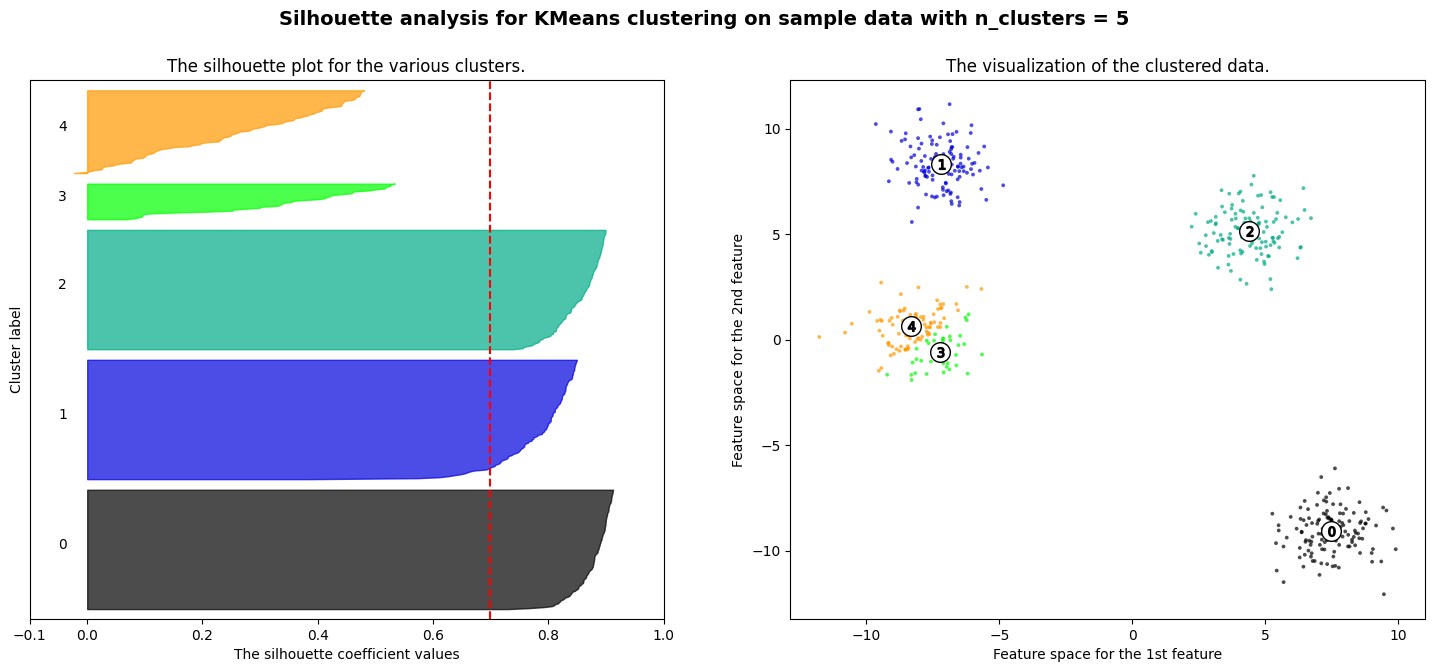

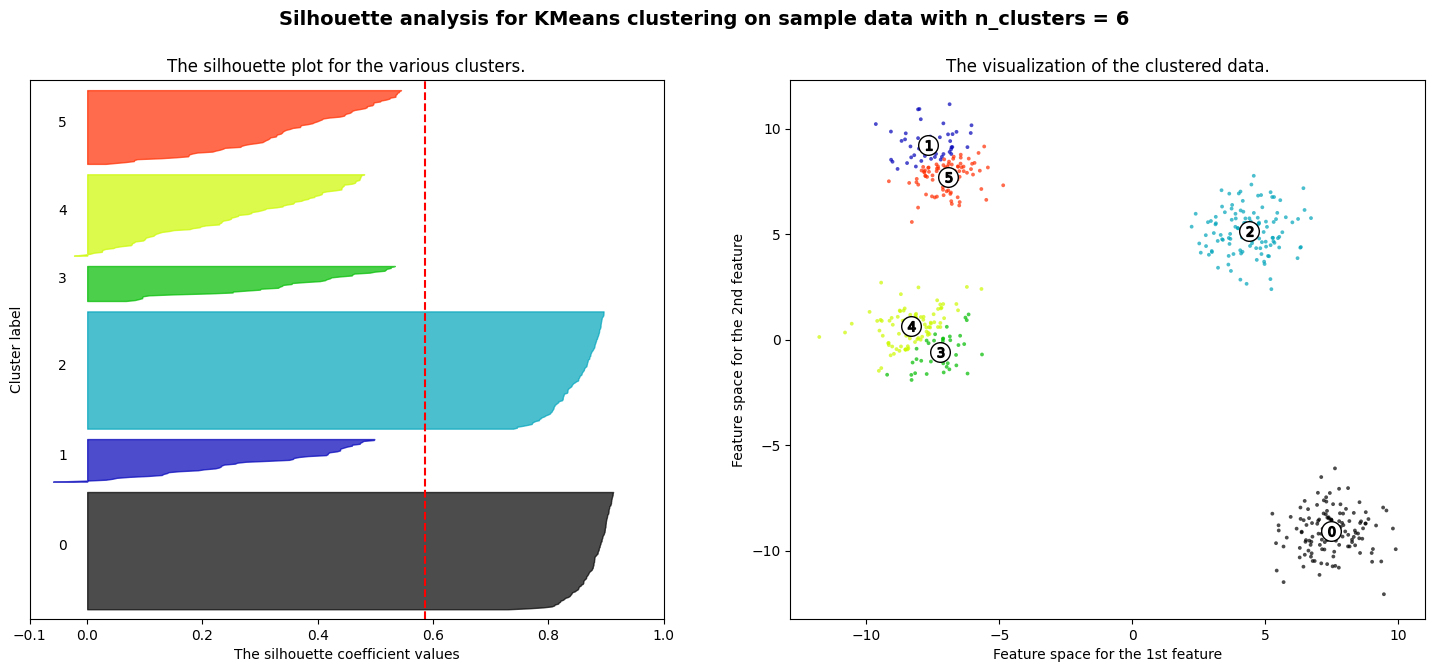

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
 # In this Kmeans is used.
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()